# LOAN DEFAULT (CLUSTER ANALYSIS)

In [9]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn import metrics
%matplotlib inline

## Step 1 :  Clustering and visualisation of numerical data

### 1.1 Data exploration and manipulation

In [10]:
df = pd.read_csv('LoanDefault.csv')
df.head()

,Age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDelinquency
0,82,0.000000,NaN,3,0,0.0,0
1,64,3819.000000,NaN,3,2,NaN,0
2,55,0.127072,1266.0,5,0,0.0,0
3,35,0.300839,5600.0,8,2,1.0,0
4,62,7963.000000,NaN,7,2,3.0,0


In [11]:
df.isnull().sum()

Age                                  0
DebtRatio                            0
MonthlyIncome                      218
NumberOfOpenCreditLinesAndLoans      0
NumberRealEstateLoansOrLines         0
NumberOfDependents                  32
SeriousDelinquency                   0
dtype: int64

In [12]:
median = df['MonthlyIncome'].median()
# mode() returns a Series
# use mode()[0] to get the first mode value
mode = df['NumberOfDependents'].mode()[0]

In [13]:
# Fill NaN values in 'col1' with its mean
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(median)
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(mode)

In [14]:
df.isnull().sum()

Age                                0
DebtRatio                          0
MonthlyIncome                      0
NumberOfOpenCreditLinesAndLoans    0
NumberRealEstateLoansOrLines       0
NumberOfDependents                 0
SeriousDelinquency                 0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1000 non-null   int64  
 1   DebtRatio                        1000 non-null   float64
 2   MonthlyIncome                    1000 non-null   float64
 3   NumberOfOpenCreditLinesAndLoans  1000 non-null   int64  
 4   NumberRealEstateLoansOrLines     1000 non-null   int64  
 5   NumberOfDependents               1000 non-null   float64
 6   SeriousDelinquency               1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [16]:
df.describe()

,Age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDelinquency
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.224000,373.212576,5318.232000,8.454000,0.964000,0.679000,0.051000
std,15.237914,1104.320432,2533.511714,5.067303,1.032361,1.046448,0.220108
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.188280,3786.250000,5.000000,0.000000,0.000000,0.000000
50%,52.000000,0.380834,5000.000000,8.000000,1.000000,0.000000,0.000000
75%,63.000000,1.115518,6500.000000,11.000000,2.000000,1.000000,0.000000
max,91.000000,12546.000000,12500.000000,32.000000,9.000000,8.000000,1.000000


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)
X_normalised = normalize(X_scaled)
print (type(X_normalised))
X_normalised = pd.DataFrame(X_normalised) # Convert numpy array to Dataframe
X_normalised

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6
0,0.769207,-0.133034,-0.049445,-0.423683,-0.367576,-0.255420,-0.091209
1,0.214426,0.865764,-0.034852,-0.298637,0.278442,-0.180035,-0.064290
2,0.085719,-0.158963,-0.752582,-0.320721,-0.439367,-0.305305,-0.109023
3,-0.705506,-0.210767,0.069416,-0.055921,0.626355,0.191461,-0.144620
4,0.087528,0.937658,-0.017137,-0.039147,0.136911,0.302599,-0.031611
...,...,...,...,...,...,...,...
995,0.274269,-0.130998,0.234791,0.883688,0.013524,-0.251650,-0.089863
996,-0.509220,-0.172134,0.752357,-0.146248,0.017774,-0.330715,-0.118096
997,0.119303,-0.221232,0.508639,-0.317144,-0.611511,-0.424923,-0.151738
998,-0.633860,-0.124475,-0.424245,-0.469107,-0.343926,-0.238986,-0.085340


In [18]:
# rename all columns using set_axis
X_normalised = X_normalised.set_axis(df.columns, axis = 1)
display (X_normalised)

,Age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDelinquency
0,0.769207,-0.133034,-0.049445,-0.423683,-0.367576,-0.255420,-0.091209
1,0.214426,0.865764,-0.034852,-0.298637,0.278442,-0.180035,-0.064290
2,0.085719,-0.158963,-0.752582,-0.320721,-0.439367,-0.305305,-0.109023
3,-0.705506,-0.210767,0.069416,-0.055921,0.626355,0.191461,-0.144620
4,0.087528,0.937658,-0.017137,-0.039147,0.136911,0.302599,-0.031611
...,...,...,...,...,...,...,...
995,0.274269,-0.130998,0.234791,0.883688,0.013524,-0.251650,-0.089863
996,-0.509220,-0.172134,0.752357,-0.146248,0.017774,-0.330715,-0.118096
997,0.119303,-0.221232,0.508639,-0.317144,-0.611511,-0.424923,-0.151738
998,-0.633860,-0.124475,-0.424245,-0.469107,-0.343926,-0.238986,-0.085340


In [19]:
pca = PCA(n_components = 2)
X_pca = pca.fit(X_scaled)

print (f"PCA components shape: {pca.components_.shape}")

print (f"PC1 loadings: {pca.components_[0]}")
print (f"PC2 loadings: {pca.components_[1]}")

original_feature_names = df.drop(columns=['SeriousDelinquency'], axis=1).columns
for feature, loading in zip(original_feature_names, pca.components_[0]):
    print (f"{feature}: {loading:.3f}")
for feature, loading in zip(original_feature_names, pca.components_[1]):
    print (f"{feature}: {loading:.3f}")

PCA components shape: (2, 7)
PC1 loadings: [ 0.07674124  0.15287836  0.47092903  0.56724546  0.61332582  0.22550632
 -0.01325757]
PC2 loadings: [ 0.69480423  0.20533455 -0.00738373  0.11164678 -0.01150827 -0.62546051
 -0.26689321]
Age: 0.077
DebtRatio: 0.153
MonthlyIncome: 0.471
NumberOfOpenCreditLinesAndLoans: 0.567
NumberRealEstateLoansOrLines: 0.613
NumberOfDependents: 0.226
Age: 0.695
DebtRatio: 0.205
MonthlyIncome: -0.007
NumberOfOpenCreditLinesAndLoans: 0.112
NumberRealEstateLoansOrLines: -0.012
NumberOfDependents: -0.625


### Visualization

#### Histograms (for distribution of individual features)

A histogram shows the distribution of a single numeric feature. If you have multiple features, you can:

1. Plot one histogram per feature

- Plot a separate histogram for each numeric column.
- Helps understand the distribution (e.g., normal, skewed) of each feature.

#### Boxplots (for comparing distributions across features or categories)

A boxplot summarizes the distribution, spread, and outliers of a feature.

Use cases:

1. Multiple features (numeric):
- Use side-by-side boxplots to compare their spread.
- This works well when all features are on a similar scale.

2. Single feature vs. categorical feature:
- Use a grouped boxplot to compare how one numeric feature varies across categories.

Example: how "salary" varies by "department".

<b>Summary:</b>

| Plot Type	| Use Case |
|:----------|:---------|
| Histogram	| Visualize distribution of individual numeric features |
| Boxplot (side-by-side)	| Compare spread/outliers across multiple numeric features |
| Boxplot (grouped)	| Compare a numeric feature across different categories |

#### Key Differences Between Histograms and Boxplots
| Feature	| Histogram	| Boxplot |
|:----------|:----------|:--------|
| Purpose	| Shows the full distribution (shape, skewness, modality) |	Summarizes spread, center, and outliers |
| Type of plot	| Frequency/distribution plot	| Summary plot |
| X-axis	| Binned ranges of values	| Categorical (or multiple features) |
| Visual Output	Bars | showing count/frequency in each bin	| Box with whiskers and potential outliers |
| Good for	| Seeing distribution shape (e.g., normal, skewed, multimodal)	| Comparing spread, center (median), and outliers |
| Outliers	| Not obvious	| Clearly shown |
| Multiple Variables	| Harder to compare side-by-side	| Easier for comparing across groups or features |

<b>When to Use Each</b>
🔸 Use Histograms When:

- You want to see the shape of the distribution (e.g., bell curve, skewed, bimodal).
- You're exploring one numeric variable at a time.
- You want to see the frequency/count of values within intervals.

✅ Best for exploratory data analysis (EDA) of individual features.

<b>Example:</b>

- Are most people in your dataset aged 20–30?
- Is the distribution of income right-skewed?

🔸 Use Boxplots When:

- You want to summarize and compare distributions (median, IQR, outliers).
- You’re comparing a numeric feature across different categories (e.g., salary by department).
- You want a quick sense of central tendency and variability.

✅ Best for comparison across groups or quickly identifying outliers.

<b>Example:</b>

- Do salaries vary a lot between departments?
- Is one group more spread out than others?
- Are there outliers in test scores?

<b>When to Use What</b>
| Scenario	| Use |
|:----------|:-----|
| Understand shape of data	| Histogram |
| Spot skewness or modality	| Histogram |
| Compare distributions across groups	| Boxplot |
| Detect outliers quickly	| Boxplot |
| See frequency of values	| Histogram |
| Summarize center/spread	| Boxplot |


In [20]:
# Ref: https://stackoverflow.com/questions/40813813/how-to-annotate-boxplot-median-quartiles-and-whiskers
def get_x_tick_labels(df, grouped_by):
    tmp = df.groupby([grouped_by]).size()
    return ["{0}: {1}".format(k,v) for k, v in tmp.to_dict().items()]

def series_values_as_dict(series_object):
    tmp = series_object.to_dict().values()
    return [y for y in tmp][0]

def add_values(bp, ax):
    """ This actually adds the numbers to the various points of the boxplots"""
    for element in ['whiskers', 'medians', 'caps']:
        for line in bp[element]:
            # Get the position of the element. y is the label you want
            (x_l, y),(x_r, _) = line.get_xydata()
            # Make sure datapoints exist 
            # (I've been working with intervals, should not be problem for this case)
            if not np.isnan(y): 
                x_line_center = x_l + (x_r - x_l)/2
                y_line_center = y  # Since it's a line and it's horisontal
                # overlay the value:  on the line, from center to right
                ax.text(x_line_center, y_line_center, # Position
                        '%.3f' % y, # Value (3f = 3 decimal float)
                        verticalalignment='center', # Centered vertically with line 
                        fontsize=16, backgroundcolor="white")

In [21]:
def doBoxPlot(df):
    fig, axes = plt.subplots(1, figsize=(20, 20))
    bp_series = df.boxplot(rot=90, 
                           figsize=(20,20), 
                           fontsize=15.0, 
                           return_type='dict',
                           whiskerprops=dict(color='blue', linewidth=2), # customise whisker properties
                           boxprops=dict(color='green', linewidth=2), # customise box properties
                           medianprops=dict(color='red', linewidth=2), # customise median properties
                           capprops=dict(color='purple', linewidth=2), # customise cap properties
                          )
    add_values(bp_series, axes)
    labels = X_normalised.columns
    plt.xticks(range(1, len(labels) +1), labels)
    plt.show()

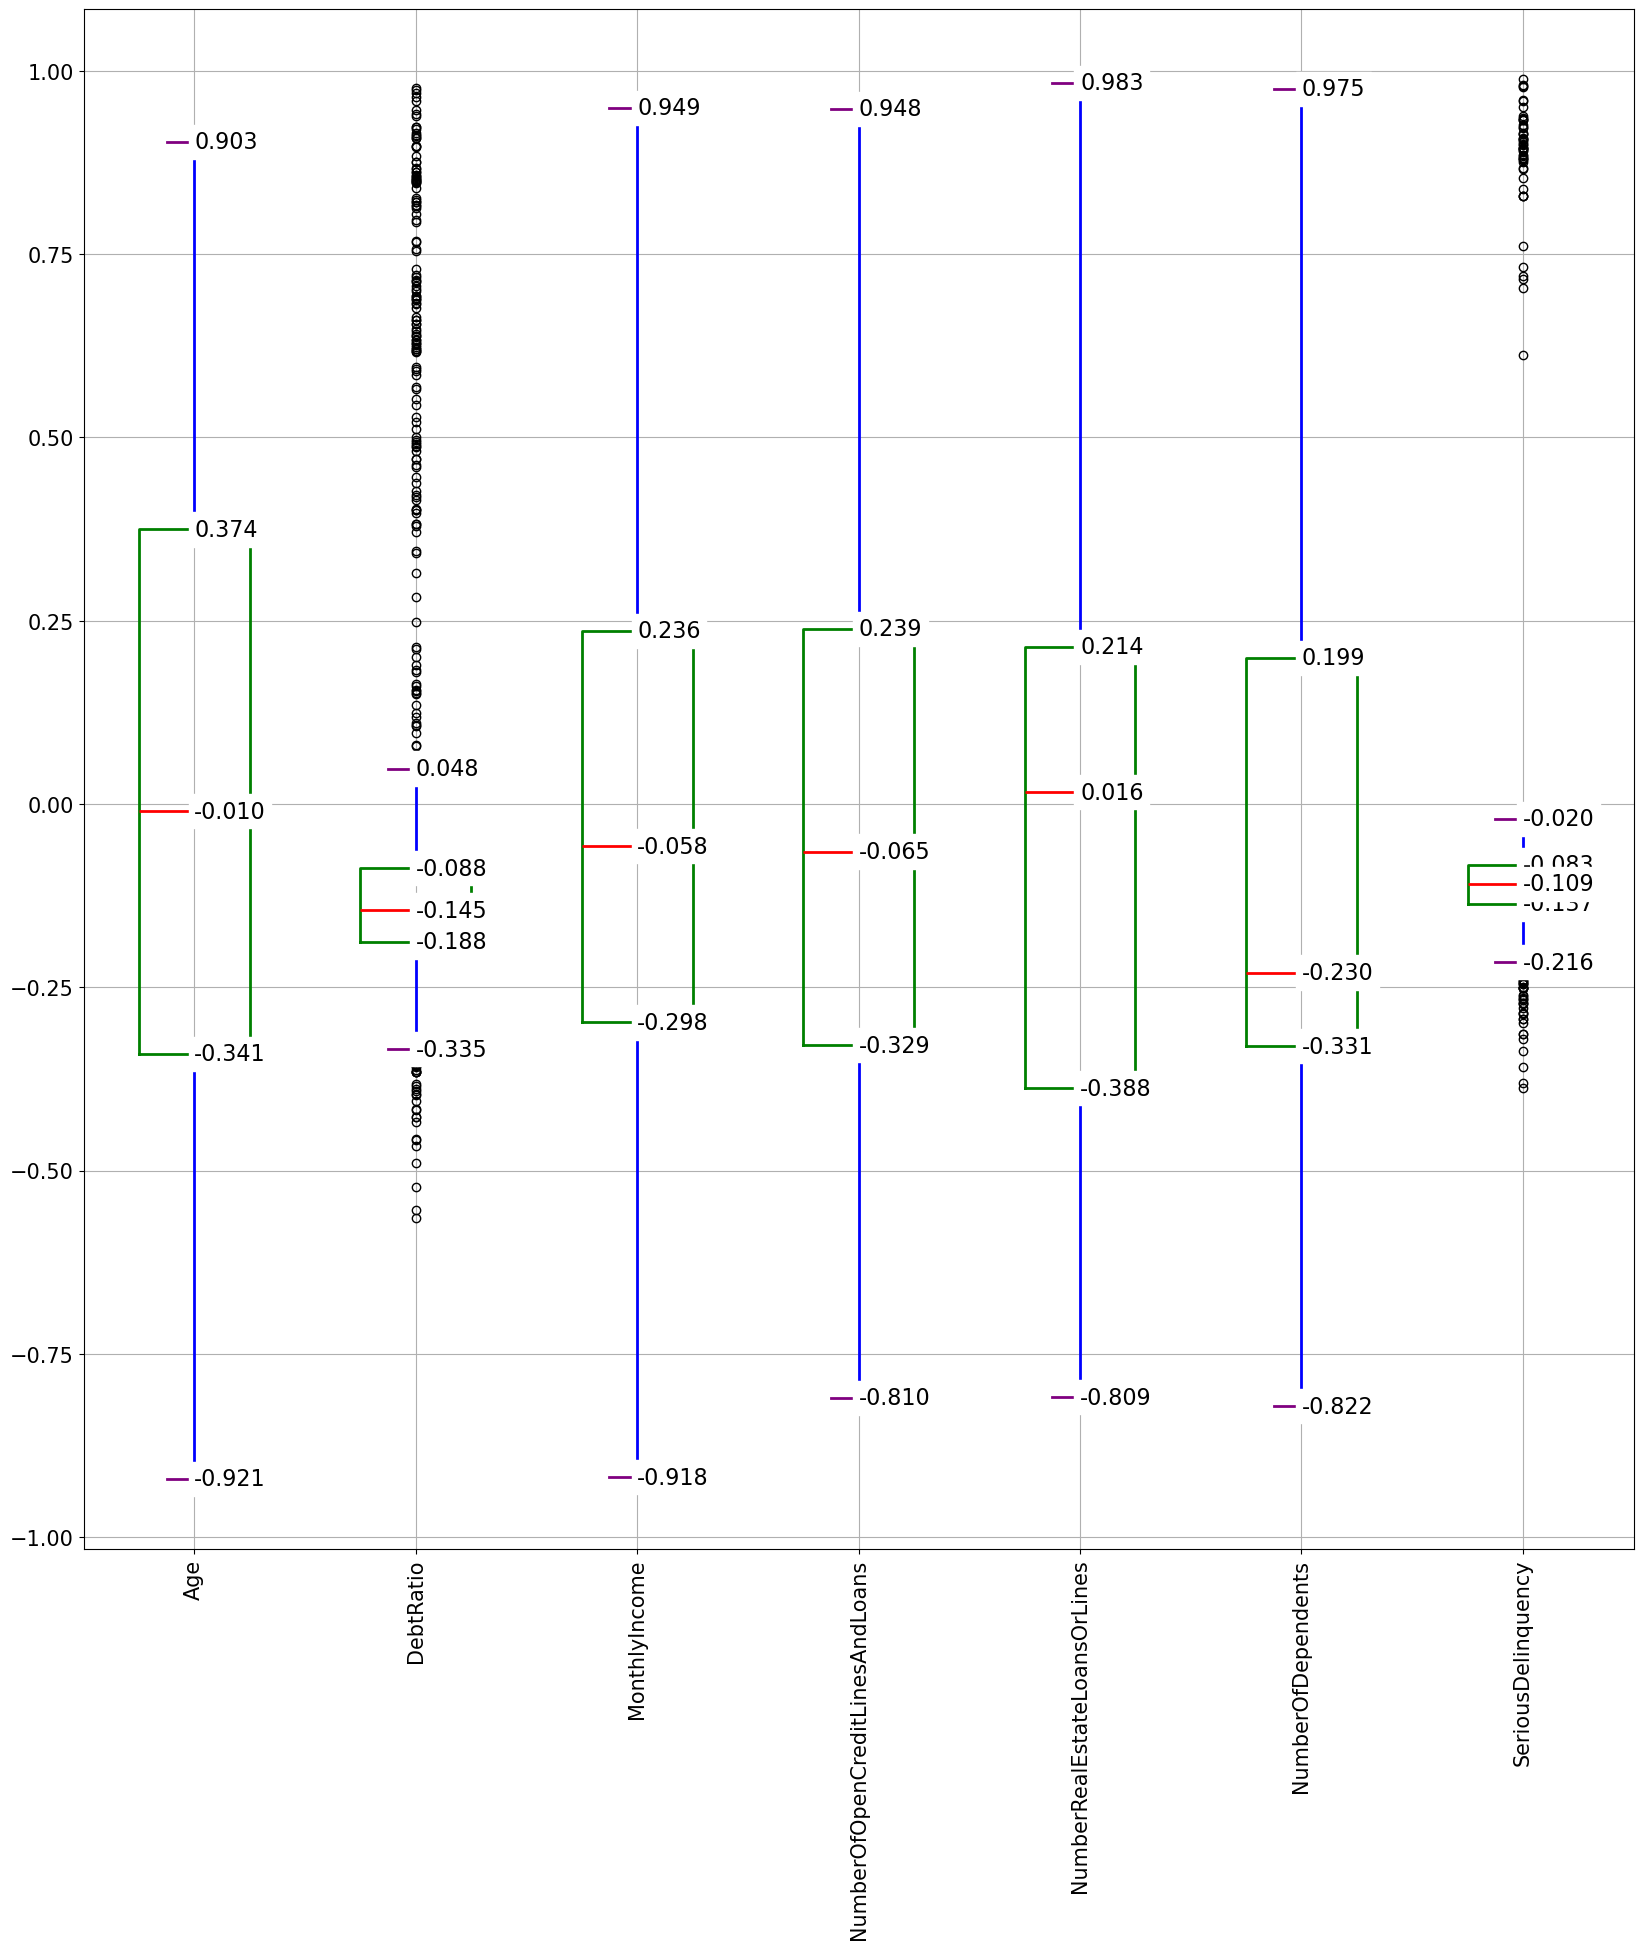

In [22]:
doBoxPlot(X_normalised)

In [25]:
def doPlotVerticalHistogram(df, num_bins):
    axes = df.hist(bins=num_bins, figsize=(20, 15), color='skyblue', edgecolor='black')
    axes = axes.flatten()
    for ax in axes:
        for patch in ax.patches:
            height = patch.get_height()
            if height > 0:
                x = patch.get_x() + patch.get_width() / 2
                y = height
                ax.text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=8)
    plt.suptitle('Histogram of features')
    # plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.tight_layout()
    plt.show()

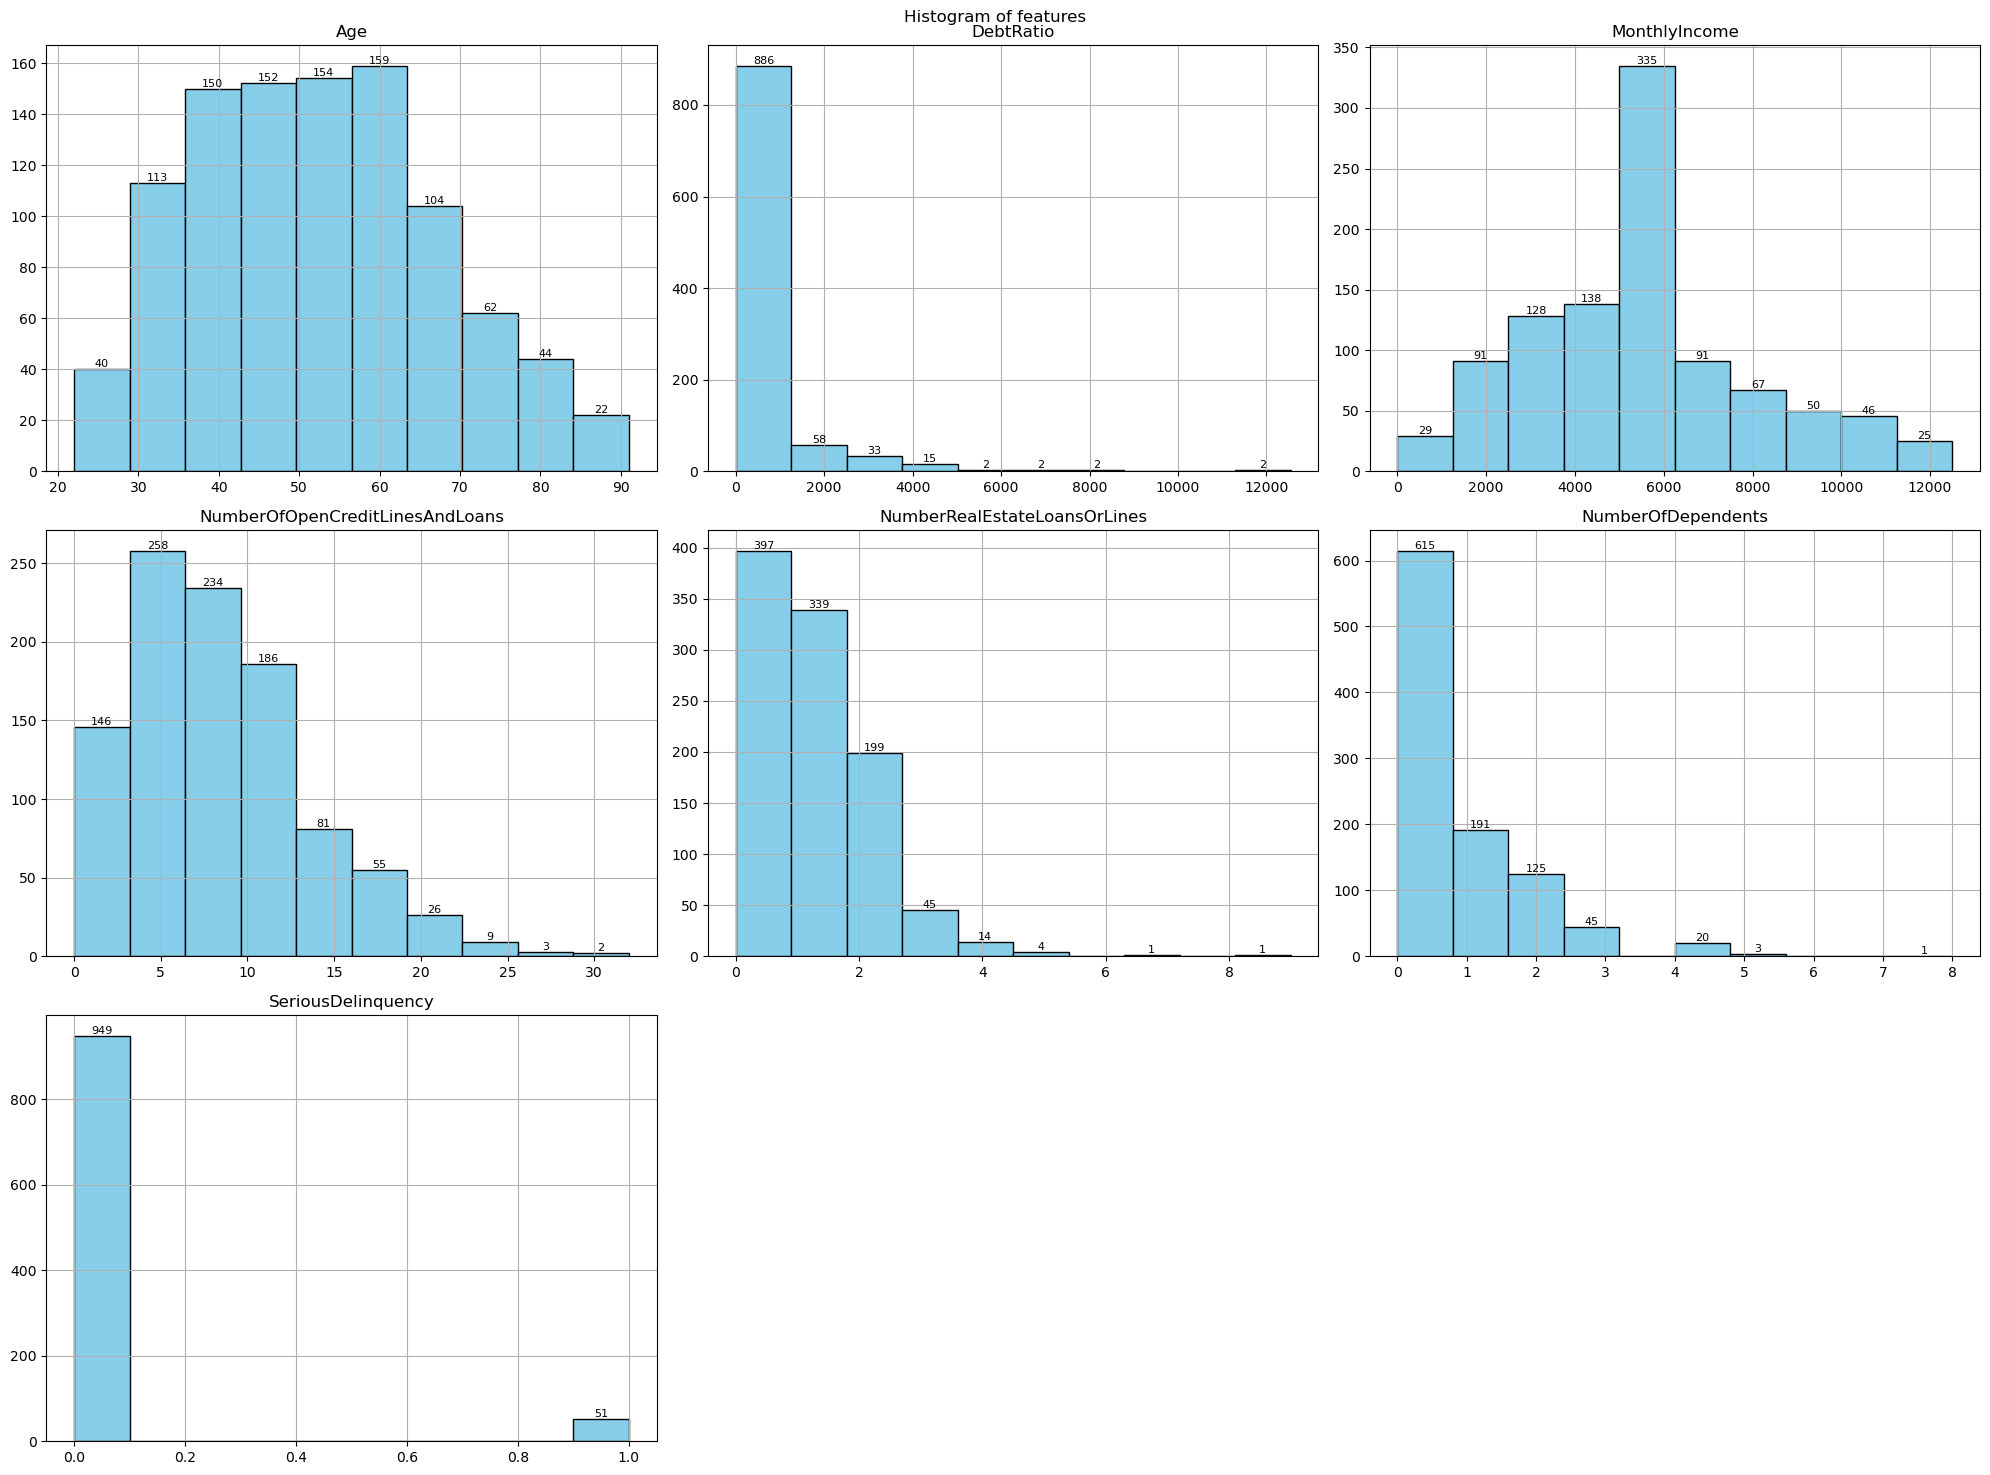

In [26]:
doPlotVerticalHistogram(df, 10)

In [27]:
def doPlotHorizontalHistogram(df, num_bins):
    axes = df.hist(alpha=0.7, bins=num_bins, figsize=(20, 20), color='skyblue', edgecolor='black', orientation='horizontal')
    axes = axes.flatten()
    for ax in axes:
        for patch in ax.patches:
            width = patch.get_width()
            if width > 0:
                x = width
                y = patch.get_y() + patch.get_height() / 2
                ax.text(x, y, f'{int(width)}', ha='left', va='center', fontsize=10)
    # plt.suptitle('Histogram of features')
    # plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.tight_layout()
    plt.show()

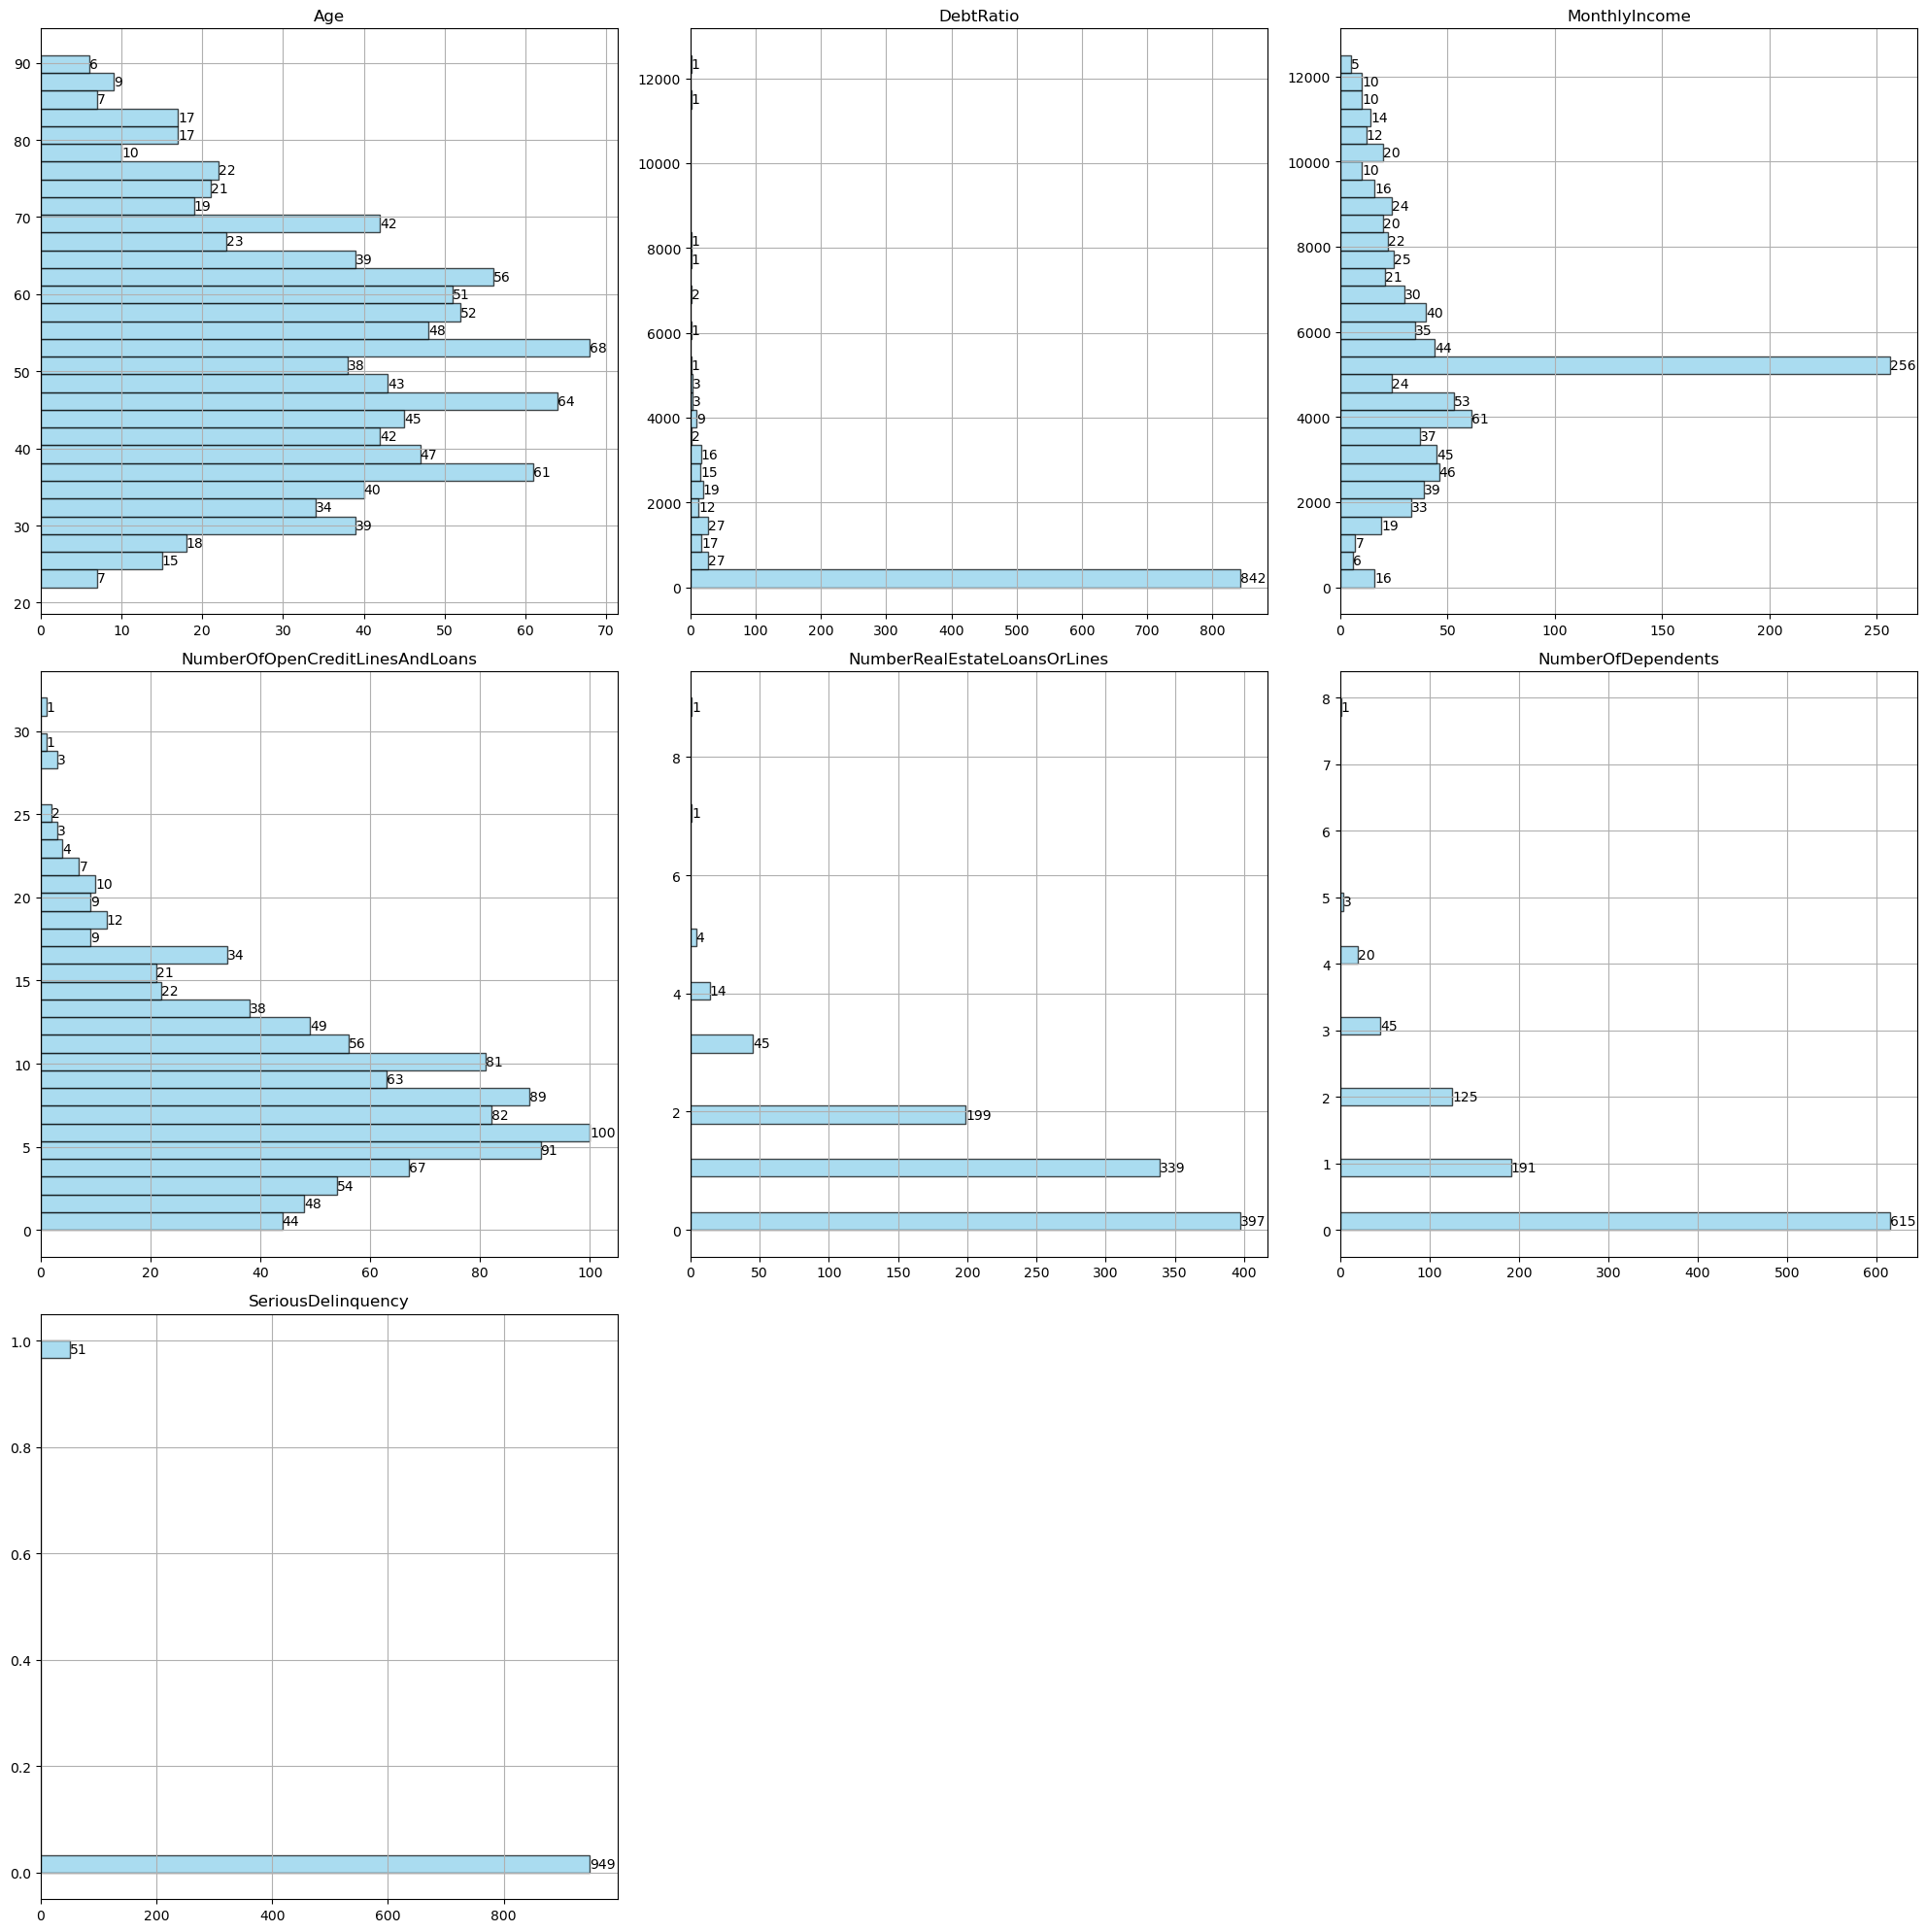

In [28]:
doPlotHorizontalHistogram(df, 30)

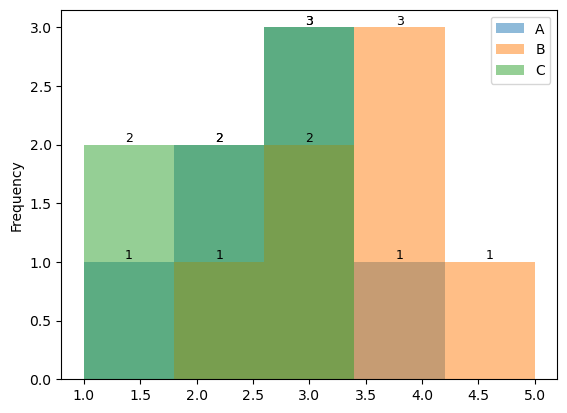

In [17]:
# Example dataframe
df_test = pd.DataFrame({
    'A': [1, 2, 2, 3, 3, 3, 4],
    'B': [2, 3, 3, 4, 4, 4, 5],
    'C': [1, 1, 2, 2, 3, 3, 3]
})

# Plot a histogram for all columns
ax = df_test.plot.hist(alpha=0.5, bins=5)

# Iterate over all patches (bars)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # skip empty bars
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # x-position
            height,                                # y-position
            f'{height:.0f}',                       # label text
            ha='center', va='bottom', fontsize=9
        )

plt.show()


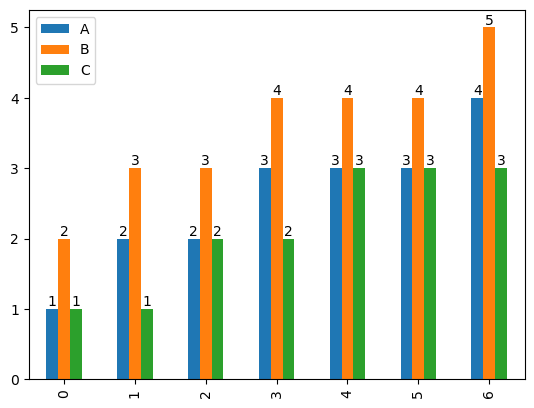

In [19]:
ax = df_test.plot.bar()
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height,
            f'{height:.0f}',
            ha='center', va='bottom'
        )
plt.show()


### 1.2 Build Hierarchical Clustering Models using Numerical Data

In [29]:
from typing import Iterable
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Silhouette requires at least 2 clusters (k >= 2)
def doComputeSilouetteScore(num_clusters: Iterable, X : np.ndarray, _linkage='average') -> list[float]:
    silhouette_scores = []
    for k in num_clusters:
        ac = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage=_linkage)
        labels = ac.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    return silhouette_scores

In [30]:
def doCpmputeMaxScore(num_clusters: Iterable, scores : list[float], byAlgo : str) -> tuple[int, float]:
    idx = np.argmax(scores)
    opt_k_score = num_clusters[np.argmax(scores)]
    max_score = np.max(scores)

    return opt_k_score, max_score

In [31]:
def doPlotScore(num_clusters: Iterable, scores : list[float], xlabel : str, ylabel : str, title : str):
    plt.figure(figsize = (12, 6))
    plt.plot(num_clusters, scores, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## Step 2 : Summarise and Interpret

Optimal K by Silhouette Score: 2 Max Score: 0.5981


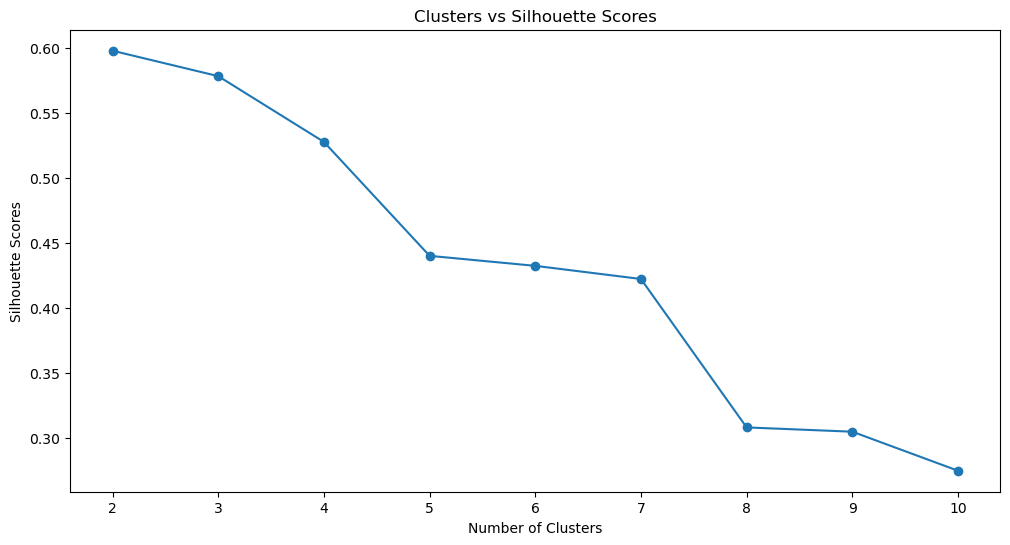

In [32]:
n_clusters_1 = range(2, 11)
silhouette_scores_1 = doComputeSilouetteScore(n_clusters_1, X_scaled)
optK, maxScore = doCpmputeMaxScore(n_clusters_1, silhouette_scores_1, 'Silhouette Scores')
print (f"Optimal K by Silhouette Score: {optK} Max Score: {maxScore:.4f}")
doPlotScore(n_clusters_1, silhouette_scores_1, 'Number of Clusters', 'Silhouette Scores', 'Clusters vs Silhouette Scores')

Optimal K by Silhouette Score: 2 Max Score: 0.4414


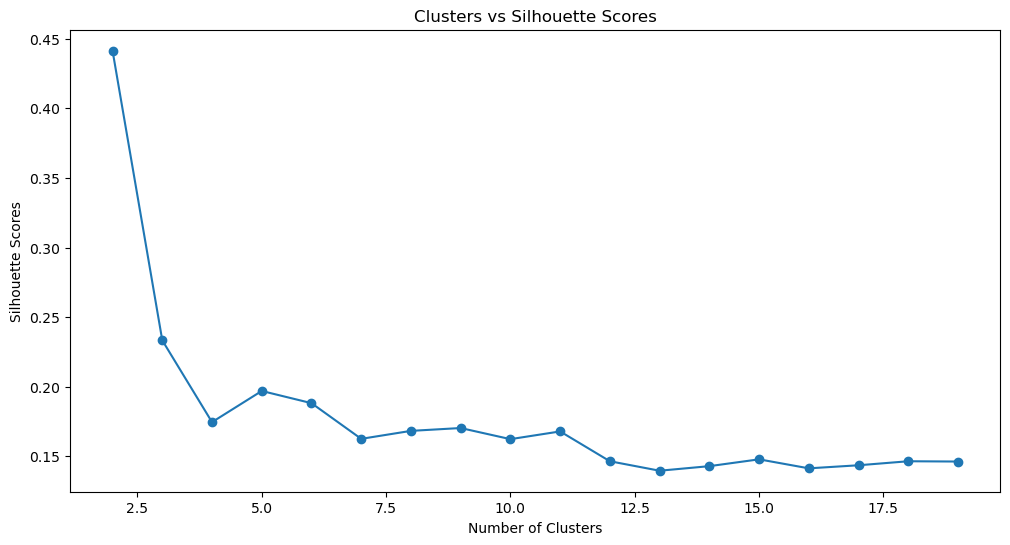

In [33]:
n_clusters_2 = range(2, 20)
silhouette_scores_2 = doComputeSilouetteScore(n_clusters_2, X_scaled, 'ward')
optK, maxScore = doCpmputeMaxScore(n_clusters_2, silhouette_scores_2, 'Silhouette Scores')
print (f"Optimal K by Silhouette Score: {optK} Max Score: {maxScore:.4f}")
doPlotScore(n_clusters_2, silhouette_scores_2, 'Number of Clusters', 'Silhouette Scores', 'Clusters vs Silhouette Scores')

In [51]:
import math
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_DOWN, ROUND_DOWN, ROUND_UP

def doPlotBar(num_clusters: Iterable, scores : list[float], xlabel : str, ylabel : str):
    plt.figure(figsize=(12, 12))
    bars = plt.bar(num_clusters, scores)
    for bar in bars:
        yval = bar.get_height()
        yval_f = "{:.2f}".format(yval)
        # Add values above each bar
        plt.text(bar.get_x(), yval + .005, str(yval_f))

    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

    ymin = scores[np.argmin(scores)]
    ymax = scores[np.argmax(scores)]

    ymin_n = Decimal(str(ymin))
    ymax_n = Decimal(str(ymax))

    xmin = min(num_clusters)
    xmax = max(num_clusters)

    # print (f"ymin = {ymin}, y_max = {ymax}, ymin_n = {ymin_n}, ymax_n={ymax_n}")
    print (ymax_n.quantize(Decimal("2"), rounding=ROUND_HALF_UP))
    plt.axis([xmin-1, xmax+1, ymin_n.quantize(Decimal("1"), rounding=ROUND_DOWN), ymax + 0.05])
    plt.show()

1


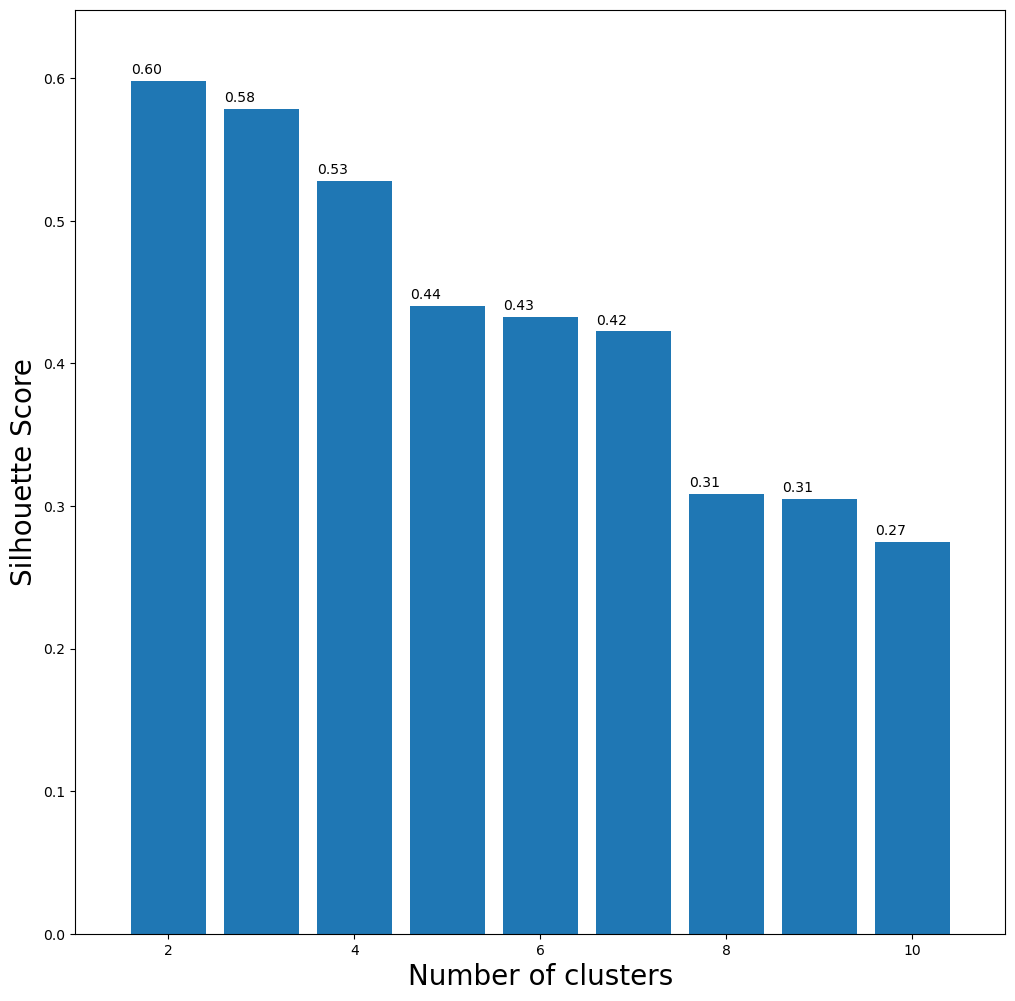

In [52]:
doPlotBar(n_clusters_1, silhouette_scores_1, 'Number of clusters', 'Silhouette Score')

0


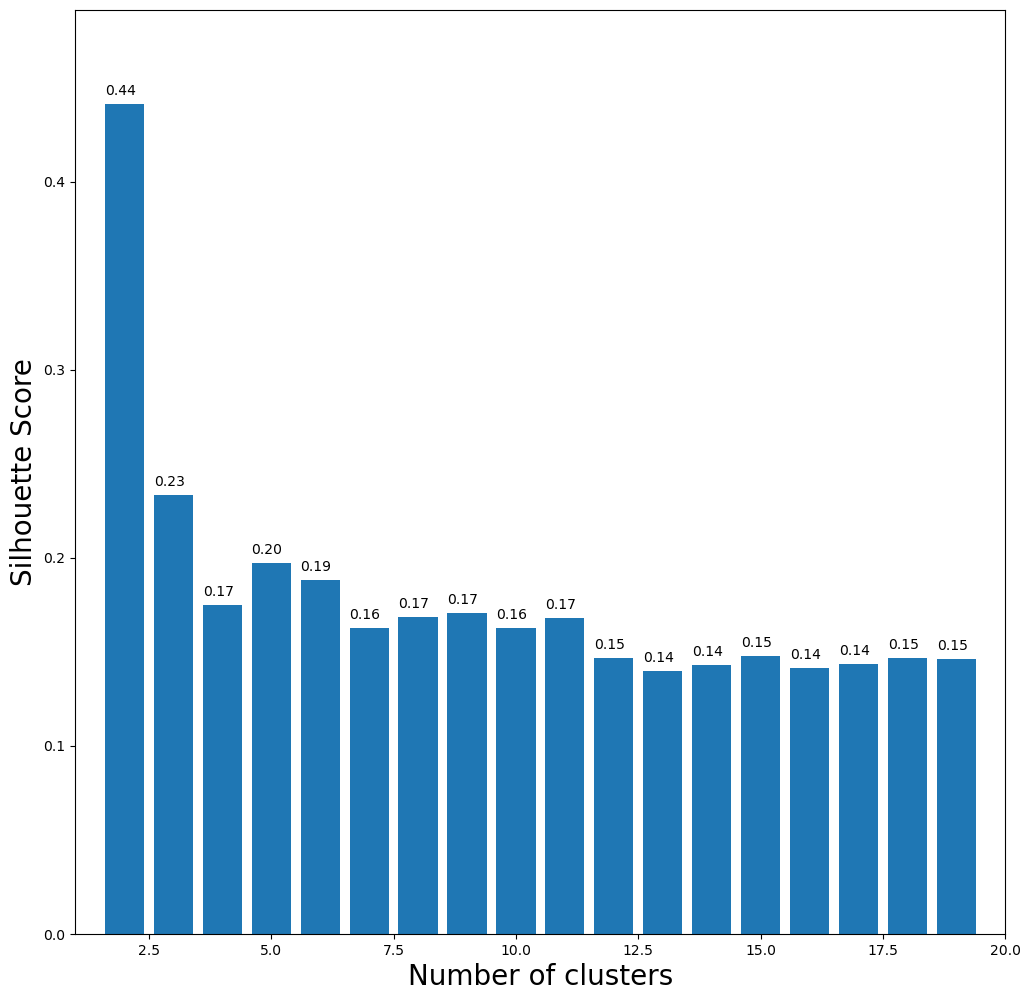

In [53]:
doPlotBar(n_clusters_2, silhouette_scores_2, 'Number of clusters', 'Silhouette Score')

#### Summarise and interpretation of each cluster.

* Comments

# TV SHOWS (ASSOCIATION RULES)

In [54]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Step 1: Load and Visualise Data

In [56]:
tv_df = pd.read_csv('TVShows.csv', header = None)
tv_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Cobra Kai,Lupin,12 Monkeys,Sherlock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Squid Game,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ozark,Squid Game,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
tv_df.isnull().sum()

0        0
1     2133
2     3743
3     5023
4     6012
5     6853
6     7493
7     8026
8     8459
9     8803
10    9046
11    9226
12    9342
13    9418
14    9494
15    9549
16    9595
17    9624
18    9638
19    9652
20    9661
21    9672
22    9676
23    9682
24    9683
25    9683
26    9684
27    9685
28    9686
29    9689
30    9689
31    9689
dtype: int64

In [58]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9690 non-null   object
 1   1       7557 non-null   object
 2   2       5947 non-null   object
 3   3       4667 non-null   object
 4   4       3678 non-null   object
 5   5       2837 non-null   object
 6   6       2197 non-null   object
 7   7       1664 non-null   object
 8   8       1231 non-null   object
 9   9       887 non-null    object
 10  10      644 non-null    object
 11  11      464 non-null    object
 12  12      348 non-null    object
 13  13      272 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [59]:
tv_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9690,7557,5947,4667,3678,2837,2197,1664,1231,887,...,14,8,7,7,6,5,4,1,1,1
unique,155,144,146,144,141,129,131,132,122,115,...,13,7,6,7,5,4,3,1,1,1
top,Daredevil,Squid Game,Squid Game,Squid Game,Two and a half men,Outer Banks,Outer Banks,Lucifer,Outer Banks,Lucifer,...,Spartacus,Dark,Shadow and Bone,The Queen's Gambit,Big Little Lies,Chernobyl,Startup,You,Big Little Lies,Dark
freq,811,649,507,316,174,149,120,74,60,48,...,2,2,2,1,2,2,2,1,1,1


In [60]:
tv_df.fillna(0, inplace=True)

In [61]:
tv_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Cobra Kai,Lupin,12 Monkeys,Sherlock,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,0,0,0,0,0,0,0,0,0,0
2,Squid Game,Dr. House,Kingdom,The Walking Dead,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ozark,Squid Game,Constantine,Preacher,Vikings,The Tick,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Naruto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,One Piece,The Blacklist,Two and a half men,Lupin,Dark,How I met your mother,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9686,One Piece,Mr. Robot,Succession,Ozark,12 Monkeys,Vikings,The Vampire Diaries,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9687,Daredevil,Atypical,Heros,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9688,Absentia,The Newsroom,The Alienist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# The value_counts() method in Pandas is used to count the occurrences of unique values within a Series or a DataFrame column. 
# It returns a new Series where the index represents the unique values and the values represent their respective counts. 
# By default, the results are sorted in descending order, with the most frequent value appearing first. 
tv_df[0].value_counts()

0
Daredevil              811
Squid Game             703
Hanna                  573
The Blacklist          474
Ozark                  457
                      ... 
The Wheel of Time        1
24                       1
Loki                     1
Sons of Anarchy          1
The Vampire Diaries      1
Name: count, Length: 155, dtype: int64

## Step 2: Preprocess the Data

In [68]:
arr = []
for i in range(tv_df.shape[0]):
    arr.append([str(tv_df.values[i, j]) for j in range(tv_df.shape[1])])
print (f"{type(arr)}")
arr = np.array(arr)
print (f"arr.shape: {arr.shape} Type: {type(arr)} Contents: {arr}")
print (f"Type: {type(tv_df.values)}, Contents: {tv_df.values}")

<class 'list'>
arr.shape: (9690, 32) Type: <class 'numpy.ndarray'> Contents: [['Cobra Kai' 'Lupin' '12 Monkeys' ... '0' '0' '0']
 ['Lost' 'Jack Ryan' 'The Flash' ... '0' '0' '0']
 ['Squid Game' 'Dr. House' 'Kingdom' ... '0' '0' '0']
 ...
 ['Daredevil' 'Atypical' 'Heros' ... '0' '0' '0']
 ['Absentia' 'The Newsroom' 'The Alienist' ... '0' '0' '0']
 ['Atypical' '0' '0' ... '0' '0' '0']]
Type: <class 'numpy.ndarray'>, Contents: [['Cobra Kai' 'Lupin' '12 Monkeys' ... 0 0 0]
 ['Lost' 'Jack Ryan' 'The Flash' ... 0 0 0]
 ['Squid Game' 'Dr. House' 'Kingdom' ... 0 0 0]
 ...
 ['Daredevil' 'Atypical' 'Heros' ... 0 0 0]
 ['Absentia' 'The Newsroom' 'The Alienist' ... 0 0 0]
 ['Atypical' 0 0 ... 0 0 0]]


In [69]:
def doPlot(df, xlabel, ylabel, title, count):
    plt.title(title)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df)))
    df.plot.bar(figsize=(20,20), color=colors)
    plt.xticks(rotation='vertical')
    plt.grid(False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

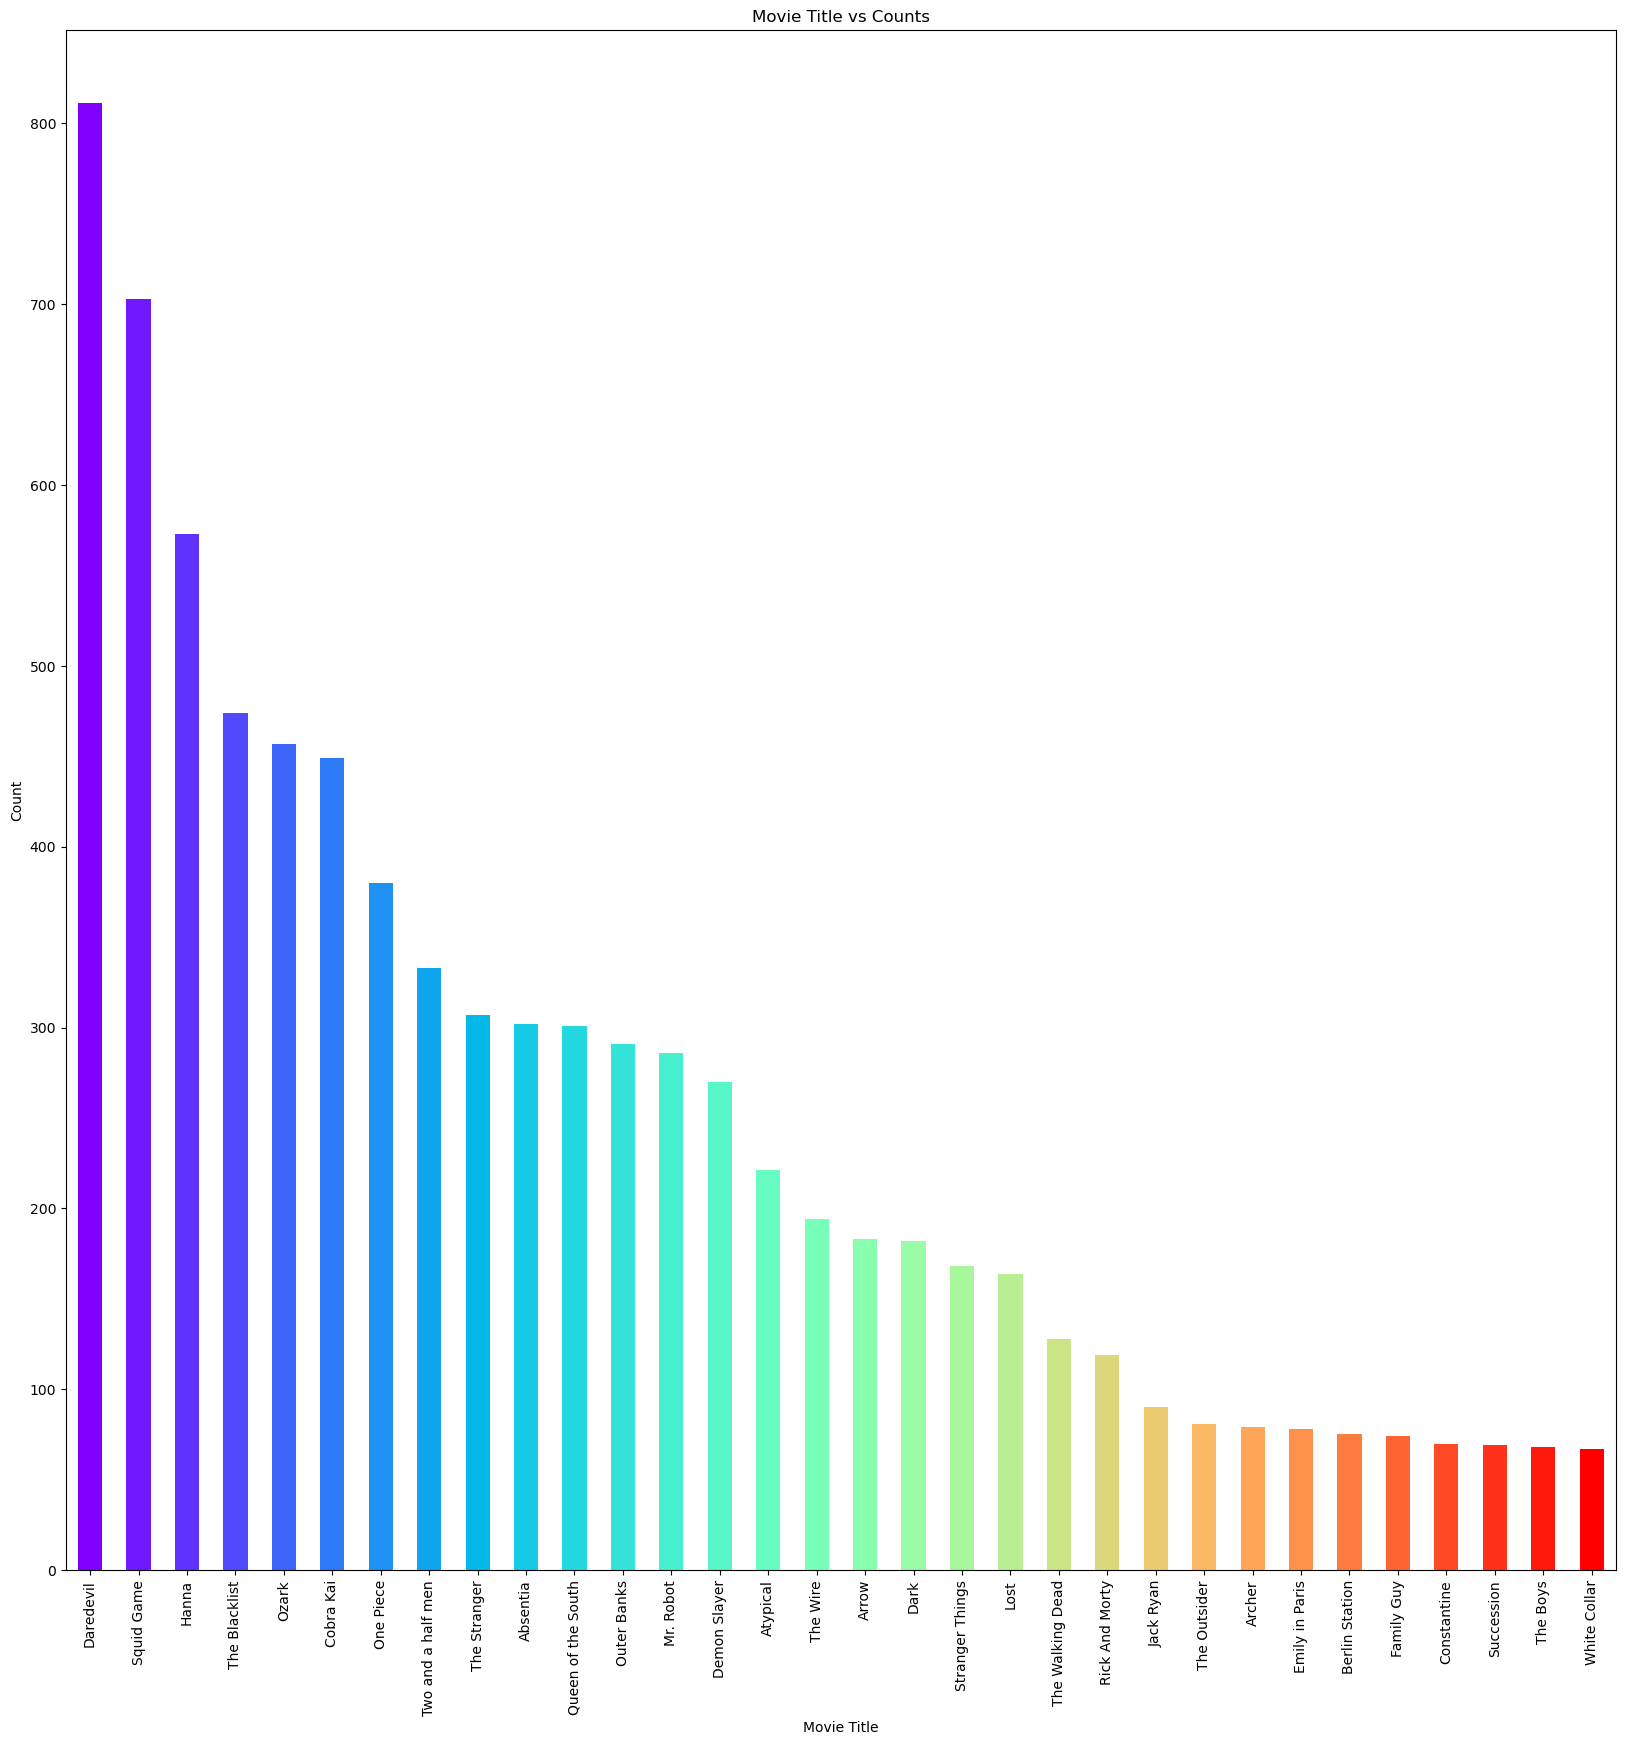

In [74]:
doPlot(tv_df[0].value_counts().iloc[:32], "Movie Title", "Count", "Movie Title vs Counts", 32)

In [73]:
type (tv_df[0].value_counts().iloc[:32])

pandas.core.series.Series

## Step 3: Generate Frequent Itemsets using Apriori Algorithm

In [75]:
te = TransactionEncoder()
tv_data = te.fit_transform(arr)
tv_data = pd.DataFrame(tv_data, columns=te.columns_)
print (tv_data.shape)

(9690, 156)


In [76]:
te.columns_

['0',
 '12 Monkeys',
 '24',
 'Absentia',
 'Alice in Borderland',
 'Altered Carbon',
 'American Gods',
 'Another Life',
 'Archer',
 'Arrow',
 'Atypical',
 'Banshee',
 'Berlin Station',
 'Better Call Saul',
 'Big Little Lies',
 'Billions',
 'Black Clover',
 'Bojack Horseman',
 'Breaking Bad',
 'Brooklyn Nine Nine',
 'Chernobyl',
 'Cobra Kai',
 'Constantine',
 'Daredevil',
 'Dark',
 'Death Note',
 'Deception',
 'Demon Slayer',
 'Designated Survivor',
 'Dexter',
 'Doctor Who',
 'Dr Stone',
 'Dr. House',
 'Elementary',
 'Elite',
 'Emily in Paris',
 'Euphoria',
 'Family Guy',
 'Friends',
 'Fringe',
 'Game of thrones',
 'Goliath',
 'Good Omens',
 'Gotham',
 "Grey's Anatomy",
 'Grimm',
 'Hanna',
 'Haven',
 'Heros',
 'His Dark Materials',
 'Homeland',
 'House of Cards',
 'How I met your mother',
 'How to get away with murder',
 'Hunters',
 'Inhumans',
 'Inside Job',
 'Into the night',
 'Invincible',
 'Iron Fist',
 'Jack Ryan',
 'Kingdom',
 'Locke & Key',
 'Loki',
 'Lost',
 'Lost in Space',
 'Lo

In [77]:
tv_data.head()

,0,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,...,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
tv_data.drop('0', axis=1, inplace=True)

In [79]:
tv_data.head()

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
supports = [0.01, 0.02, 0.05, 0.08, 0.1]

# Create an array of len(supports) empty dataframe
frequent_itemsets_df = [pd.DataFrame() for _ in range(len(supports))]

for index, s in enumerate(supports):
    frequent_itemsets_df[index] = apriori(tv_data, min_support=s, use_colnames=True)

In [90]:
for i in range(len(frequent_itemsets_df)):
    frequent_itemsets_df[i]['length'] = frequent_itemsets_df[i]['itemsets'].apply(lambda x: len(x))
    print (f"frequent_itemsets_{i}\n {frequent_itemsets_df[i]}")

frequent_itemsets_0
       support                                         itemsets  length
0    0.058617                                     (12 Monkeys)       1
1    0.077090                                       (Absentia)       1
2    0.024768                            (Alice in Borderland)       1
3    0.057792                                         (Archer)       1
4    0.026109                                          (Arrow)       1
..        ...                                              ...     ...
342  0.017337               (The Blacklist, Ozark, Squid Game)       3
343  0.010526               (Ozark, Squid Game, The Mentalist)       3
344  0.010836            (The Walking Dead, Ozark, Squid Game)       3
345  0.018266          (Two and a half men, Ozark, Squid Game)       3
346  0.010939  (Two and a half men, The Blacklist, Squid Game)       3

[347 rows x 3 columns]
frequent_itemsets_1
       support                                itemsets  length
0    0.058617       

In [92]:
# Create an array of len(supports) empty dataframe
filtered_freq_rules_df = [pd.DataFrame() for _ in range(len(frequent_itemsets_df))]

for i in range(len(frequent_itemsets_df)):
    mask = frequent_itemsets_df[i]['length'] > 1
    filtered_freq_rules_df[i] = frequent_itemsets_df[i].loc[mask]

## Step 4 : Generate the Association Rules

In [93]:
rules = [pd.DataFrame() for _ in range(len(frequent_itemsets_df))]

for i in range(len(frequent_itemsets_df)):
    rules[i] = association_rules(frequent_itemsets_df[i], metric='confidence', min_threshold=0.02)

In [95]:
for i in range(len(frequent_itemsets_df)):
    display(rules[i][['antecedents', 'consequents', 'support', 'confidence', 'lift']])

,antecedents,consequents,support,confidence,lift
0,(Atypical),(12 Monkeys),0.014241,0.101770,1.736180
1,(12 Monkeys),(Atypical),0.014241,0.242958,1.736180
2,(Mr. Robot),(12 Monkeys),0.011249,0.102830,1.754269
3,(12 Monkeys),(Mr. Robot),0.011249,0.191901,1.754269
4,(Outer Banks),(12 Monkeys),0.010217,0.058373,0.995829
...,...,...,...,...,...
651,"(Two and a half men, Squid Game)",(The Blacklist),0.010939,0.190305,1.815017
652,"(The Blacklist, Squid Game)",(Two and a half men),0.010939,0.257282,1.401382
653,(Two and a half men),"(The Blacklist, Squid Game)",0.010939,0.059584,1.401382
654,(The Blacklist),"(Two and a half men, Squid Game)",0.010939,0.104331,1.815017


,antecedents,consequents,support,confidence,lift
0,(Squid Game),(12 Monkeys),0.024355,0.094438,1.611095
1,(12 Monkeys),(Squid Game),0.024355,0.415493,1.611095
2,(Atypical),(Cobra Kai),0.021569,0.154130,1.855301
3,(Cobra Kai),(Atypical),0.021569,0.259627,1.855301
4,(Family Guy),(Atypical),0.020743,0.290043,2.072654
...,...,...,...,...,...
135,"(Mr. Robot, Squid Game)",(Ozark),0.023117,0.471579,2.434523
136,"(Ozark, Squid Game)",(Mr. Robot),0.023117,0.306011,2.797402
137,(Mr. Robot),"(Ozark, Squid Game)",0.023117,0.211321,2.797402
138,(Ozark),"(Mr. Robot, Squid Game)",0.023117,0.119339,2.434523


,antecedents,consequents,support,confidence,lift
0,(Atypical),(Squid Game),0.056244,0.401917,1.558455
1,(Squid Game),(Atypical),0.056244,0.218087,1.558455
2,(Ozark),(Squid Game),0.075542,0.389984,1.512183
3,(Squid Game),(Ozark),0.075542,0.292917,1.512183
4,(Two and a half men),(Squid Game),0.057482,0.313097,1.214051
5,(Squid Game),(Two and a half men),0.057482,0.222889,1.214051


,antecedents,consequents,support,confidence,lift


,antecedents,consequents,support,confidence,lift


In [96]:
for i in range(len(frequent_itemsets_df)):
    display(rules[i].describe())


,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.0,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,0.117087,0.117087,0.016373,0.194130,1.720814,1.0,0.005890,1.114831,0.420304,0.075009,0.091801,0.194130
std,0.071237,0.071237,0.008335,0.125687,0.493866,0.0,0.003843,0.139472,0.200275,0.024960,0.091127,0.052979
min,0.017337,0.017337,0.010010,0.038816,0.809376,1.0,-0.004168,0.958895,-0.223894,0.037204,-0.042867,0.096638
25%,0.058437,0.058437,0.011017,0.100120,1.353043,1.0,0.003767,1.029250,0.309151,0.056617,0.028419,0.151021
50%,0.097936,0.097936,0.013519,0.157979,1.652442,1.0,0.005521,1.064013,0.449485,0.071719,0.060162,0.184279
75%,0.183591,0.183591,0.018602,0.259412,2.010189,1.0,0.007508,1.140350,0.568148,0.088607,0.123077,0.233364
max,0.257895,0.257895,0.075542,0.593137,3.378506,1.0,0.026385,1.981737,0.835207,0.200878,0.495392,0.341451


,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.150370,0.150370,0.028841,0.234682,1.606883,1.0,0.009619,1.125535,0.401451,0.105852,0.102917,0.234682
std,0.070614,0.070614,0.010105,0.114987,0.388032,0.0,0.005373,0.117858,0.183521,0.025867,0.083471,0.043379
min,0.043756,0.043756,0.020124,0.079632,0.907658,1.0,-0.004168,0.968907,-0.120564,0.069266,-0.032091,0.159748
25%,0.088648,0.088648,0.022497,0.132983,1.304146,1.0,0.006257,1.043530,0.273263,0.088745,0.041714,0.199246
50%,0.139938,0.139938,0.025181,0.217922,1.556329,1.0,0.009627,1.082183,0.418362,0.099539,0.075939,0.233556
75%,0.193705,0.193705,0.030650,0.314768,1.844355,1.0,0.012553,1.186995,0.535898,0.116578,0.157511,0.258666
max,0.257895,0.257895,0.075542,0.514151,2.797402,1.0,0.026385,1.527440,0.730802,0.200878,0.345310,0.341451


,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.215153,0.215153,0.063089,0.306482,1.428230,1.0,0.018625,1.138089,0.371590,0.171741,0.118083,0.306482
std,0.050188,0.050188,0.009662,0.078879,0.167188,0.0,0.007011,0.076363,0.115010,0.023541,0.058192,0.032964
min,0.139938,0.139938,0.056244,0.218087,1.214051,1.0,0.010135,1.050569,0.215959,0.149691,0.048135,0.267993
25%,0.186120,0.186120,0.056553,0.240396,1.288584,1.0,0.012640,1.085260,0.282348,0.153431,0.078506,0.278495
50%,0.225800,0.225800,0.057482,0.303007,1.512183,1.0,0.020154,1.120129,0.418359,0.164653,0.106956,0.310002
75%,0.257895,0.257895,0.071027,0.370762,1.546887,1.0,0.024228,1.197479,0.447326,0.191822,0.164256,0.333589
max,0.257895,0.257895,0.075542,0.401917,1.558455,1.0,0.025586,1.240807,0.482868,0.200878,0.194073,0.341451


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
for i in range(len(frequent_itemsets_df)):
    if rules[i].empty:
        print (f"rules[{i}] is empty")
    else:
        max_row = rules[i].nlargest(1, 'confidence')
        display(max_row)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
578,"(The Blacklist, Mr. Robot)",(Ozark),0.021053,0.193705,0.012487,0.593137,3.062067,1.0,0.008409,1.981737,0.687905,0.061735,0.495392,0.328801


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
128,"(Atypical, Ozark)",(Squid Game),0.043756,0.257895,0.022497,0.514151,1.993647,1.0,0.011213,1.52744,0.521213,0.080591,0.34531,0.300693


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Atypical),(Squid Game),0.139938,0.257895,0.056244,0.401917,1.558455,1.0,0.020154,1.240807,0.416643,0.164653,0.194073,0.310002


rules[3] is empty
rules[4] is empty


In [98]:
for i in range(len(frequent_itemsets_df)):
    if rules[i].empty:
        print (f"rules[{i}] is empty")
    else:
        max_row = rules[i][rules[i]['confidence'] == rules[i]['confidence'].max()]
        display(max_row)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
578,"(The Blacklist, Mr. Robot)",(Ozark),0.021053,0.193705,0.012487,0.593137,3.062067,1.0,0.008409,1.981737,0.687905,0.061735,0.495392,0.328801


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
128,"(Atypical, Ozark)",(Squid Game),0.043756,0.257895,0.022497,0.514151,1.993647,1.0,0.011213,1.52744,0.521213,0.080591,0.34531,0.300693


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Atypical),(Squid Game),0.139938,0.257895,0.056244,0.401917,1.558455,1.0,0.020154,1.240807,0.416643,0.164653,0.194073,0.310002


rules[3] is empty
rules[4] is empty


In [99]:
for i in range(len(frequent_itemsets_df)):
    if rules[i].empty:
        print (f"rules[{i}] is empty")
    else:
        max_row = rules[i].loc[rules[i]['confidence'].idxmax()]
        display(max_row)

antecedents           (The Blacklist, Mr. Robot)
consequents                              (Ozark)
antecedent support                      0.021053
consequent support                      0.193705
support                                 0.012487
confidence                              0.593137
lift                                    3.062067
representativity                             1.0
leverage                                0.008409
conviction                              1.981737
zhangs_metric                           0.687905
jaccard                                 0.061735
certainty                               0.495392
kulczynski                              0.328801
Name: 578, dtype: object

antecedents           (Atypical, Ozark)
consequents                (Squid Game)
antecedent support             0.043756
consequent support             0.257895
support                        0.022497
confidence                     0.514151
lift                           1.993647
representativity                    1.0
leverage                       0.011213
conviction                      1.52744
zhangs_metric                  0.521213
jaccard                        0.080591
certainty                       0.34531
kulczynski                     0.300693
Name: 128, dtype: object

antecedents             (Atypical)
consequents           (Squid Game)
antecedent support        0.139938
consequent support        0.257895
support                   0.056244
confidence                0.401917
lift                      1.558455
representativity               1.0
leverage                  0.020154
conviction                1.240807
zhangs_metric             0.416643
jaccard                   0.164653
certainty                 0.194073
kulczynski                0.310002
Name: 0, dtype: object

rules[3] is empty
rules[4] is empty


In [100]:
import networkx as nx

def doScatterPlot(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, alpha=0.7, color='b')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.title("Confidence vs Lift in Association Rules")
    plt.grid()
    plt.show()

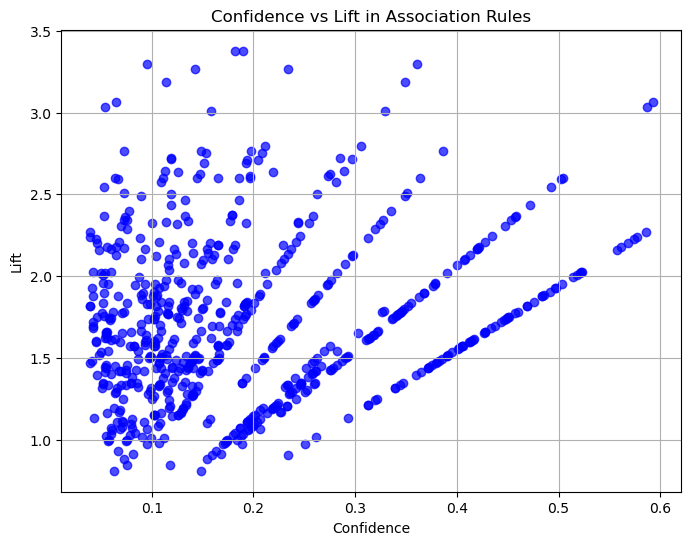

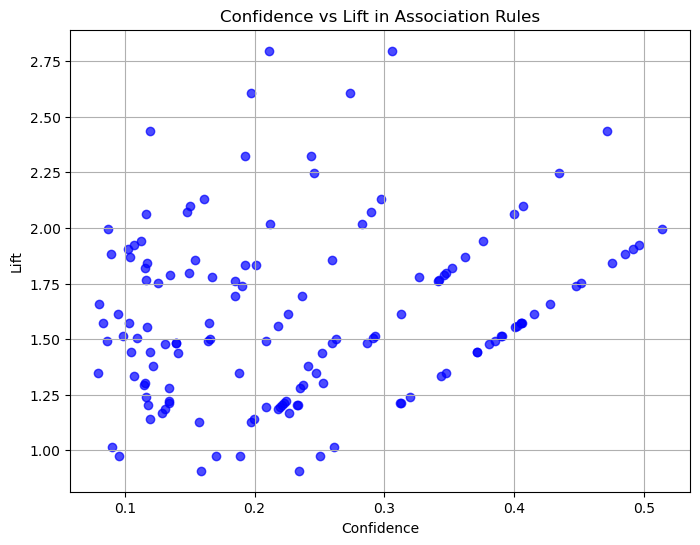

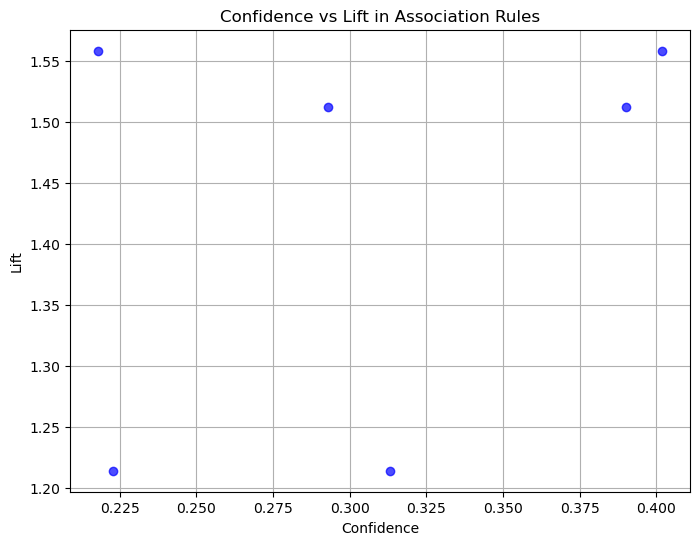

rules[3] is empty
rules[4] is empty


In [101]:
for i in range(len(frequent_itemsets_df)):
    if rules[i].empty:
        print (f"rules[{i}] is empty")
    else:
        doScatterPlot(rules[i]['confidence'], rules[i]['lift'])

In [ ]:
def doNetworkGraph(rules):
    G = nx.DiGraph()
    for _, row in rules.iterrows():
        G.add_edge(tuple(row['antecendents'], row['consequents']), weight=row['confidence'])
        plt.figure(figsize=(20,20))

#### What recommendations would you make?

* Comments